## Statistical Learning and Deep Learning, 2020 Fall
### Homework 2

### Q1
First, read the training data and the testing data.

In [17]:
import numpy as np
import pandas as pd
import pickle
from sklearn import preprocessing

# read data
train = pd.read_csv('adult.data', header=None)
test = pd.read_csv('adult.test', header=None)

# assign column names
col_name = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 
           'marital-status', 'occupation', 'relationship', 'race', 'gender', 
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
train.columns = col_name
test.columns = col_name

# reorder columns
col_sequence = ['capital-loss', 'hours-per-week', 'capital-gain', 'educational-num', 'age', 'fnlwgt', 
              'relationship', 'race', 'gender', 'occupation', 'education', 'native-country', 'workclass', 
               'marital-status', 'income']
train = train[col_sequence]
test = test[col_sequence]
print(train.columns)
print(test.columns)

Index(['capital-loss', 'hours-per-week', 'capital-gain', 'educational-num',
       'age', 'fnlwgt', 'relationship', 'race', 'gender', 'occupation',
       'education', 'native-country', 'workclass', 'marital-status', 'income'],
      dtype='object')
Index(['capital-loss', 'hours-per-week', 'capital-gain', 'educational-num',
       'age', 'fnlwgt', 'relationship', 'race', 'gender', 'occupation',
       'education', 'native-country', 'workclass', 'marital-status', 'income'],
      dtype='object')


Then, remove NaNs.

In [18]:
train = train.replace(' ?', np.NaN).dropna()
test = test.replace(' ?', np.NaN).dropna()
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
print('train shape', train.shape)
print('test shape', test.shape)

train shape (30162, 15)
test shape (15060, 15)


Split $x$, $y$. Convert '>50K' and '<=50K' into 1 and 0.

In [19]:
x_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1:]
x_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1:]

convert_train = {' >50K': 1, ' <=50K': 0}
convert_test = {' >50K.': 1, ' <=50K.': 0}
y_train['income'] = y_train['income'].map(convert_train)
y_test['income'] = y_test['income'].map(convert_test)
print(f'x_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_test: {y_test.shape}')

x_train: (30162, 14)
y_train: (30162, 1)
x_test: (15060, 14)
y_test: (15060, 1)


For all categorical features, apply 1-of-K encoding.

In [20]:
x_train_cat = x_train.select_dtypes(include='object')
x_train_num = x_train.select_dtypes(include='int64')
x_test_cat = x_test.select_dtypes(include='object')
x_test_num = x_test.select_dtypes(include='int64')

x_train_cat = pd.get_dummies(x_train_cat)
x_train_cat.columns = x_train_cat.columns.str.replace(' ', '')
x_test_cat = pd.get_dummies(x_test_cat)
x_test_cat.columns = x_test_cat.columns.str.replace(' ', '')
print('x_train_cat shape: ', x_train_cat.shape)
print('x_train_num shape: ', x_train_num.shape)
print('x_test_cat shape: ', x_test_cat.shape)
print('x_test_num shape: ', x_test_num.shape)

x_train_cat shape:  (30162, 98)
x_train_num shape:  (30162, 6)
x_test_cat shape:  (15060, 97)
x_test_num shape:  (15060, 6)


Remove features that appeared less than 10 times.

In [21]:
x_train_cat = x_train_cat[x_train_cat.columns[x_train_cat.sum() >= 10]]
x_test_cat = x_test_cat[x_train_cat.columns]
print('x_train_cat shape: ', x_train_cat.shape)
print('x_test_cat shape: ', x_test_cat.shape)

x_train_cat shape:  (30162, 96)
x_test_cat shape:  (15060, 96)


Normalize numerical features.

In [22]:
x_train_val = x_train_num.to_numpy()
x_scaler = preprocessing.StandardScaler().fit(x_train_val)
x_train_val = x_scaler.transform(x_train_val)
x_train_num = pd.DataFrame(data=x_train_val, columns=x_train_num.columns)

x_test_val = x_scaler.transform(x_test_num.to_numpy())
x_test_num = pd.DataFrame(data=x_test_val, columns=x_test_num.columns)

Combine data into dictionary.

In [23]:
adult50 = {}
adult50['num_col'] = x_train_num.columns.to_list()
x_train = pd.concat([x_train_num, x_train_cat], axis=1)
x_test = pd.concat([x_test_num, x_test_cat], axis=1)
adult50['x_train'] = x_train.to_numpy()
adult50['x_test'] = x_test.to_numpy()
adult50['y_train'] = np.reshape(y_train.to_numpy(), (1, -1))
adult50['y_test'] = np.reshape(y_test.to_numpy(), (1, -1))
adult50['columnname'] = x_train.columns.tolist()
adult50['num_col'] = x_train_num.columns.to_list()

Compare our result with `adult_m50k.pickle`.

In [24]:
import pickle
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

print('test dictionary keys: ', adult50kp.keys() == adult50.keys())
print('test columnname: ', adult50kp['columnname'] == adult50['columnname'])
print('test num_col: ', adult50kp['num_col'] == adult50['num_col'])

elems = ['x_train', 'x_test', 'y_train', 'y_test']
for aelem in elems:
    cnomatch = np.sum(adult50kp[aelem] != adult50[aelem])
    if cnomatch == 0:
        print(aelem, "match!")
    else:
        print(aelem, "%d elements no match!" % cnomatch)

test dictionary keys:  True
test columnname:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
test num_col:  True
x_train match!
x_test match!
y_train match!
y_test match!


### Q2

In [34]:
import pickle
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load dataset
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)
    
# train prediction model
c = 0.3
lr2 = LogisticRegression(solver = 'lbfgs', C= c, max_iter = 1000)
lr2.fit(adult50kp['x_train'], adult50kp['y_train'])

# make prediction
ypred = lr2.predict(adult50kp['x_test'])
ypredprob = lr2.predict_proba(adult50kp['x_test'])

# compute accuracy
ncorrect = np.sum(adult50kp['y_test'] == ypred)
accuracy_sk = ncorrect / adult50kp['y_test'].shape[0]
print("Accuracy = %f" % accuracy_sk)    

Accuracy = 0.848406


#### Q2.1
Plot ROC curve.

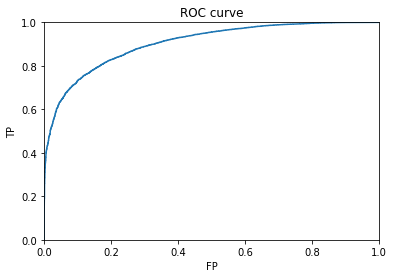

In [113]:
# define TP and FP
def TP(pred, actual):
    # TP = TP / P
    assert(pred.shape == actual.shape)
    n_data = pred.shape[0]
    p = n_data - np.sum(actual)
    tp = np.sum(np.logical_and(actual == [0]*n_data, pred == [0]*n_data))
    return (tp / p)
    
def FP(pred, actual):
    # FP = FP / N
    assert(pred.shape == actual.shape)
    n_data = pred.shape[0]
    n = np.sum(actual)
    fp = np.sum(np.logical_and(actual == [1]*n_data, pred == [0]*n_data))
    return(fp / n)


# compute TP and FP under different threshold
pos_prob = ypredprob[:, 0]
all_prob = np.sort(np.append(pos_prob, [0, 1]))

fp_rate = []
tp_rate = []
for thres in all_prob:
    above_thres = list(map(lambda p: 0 if p > thres else 1, pos_prob))
    above_thres = np.array(above_thres)
    fpr = FP(above_thres, adult50kp['y_test'])
    tpr = TP(above_thres, adult50kp['y_test'])
    fp_rate.append(fpr)
    tp_rate.append(tpr)

# plot
plt.title('ROC curve')
plt.xlabel('FP')
plt.ylabel('TP')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.plot(fp_rate, tp_rate)